<!--  -->Import of necessary libraries

In [12]:
import shutil
from shutil import copyfile
import random
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, MaxPooling2D, BatchNormalization, Dropout,Conv2D
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

<!--  -->Folder preparation

In [13]:
os.mkdir('C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/temp')
os.mkdir('C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/train')
os.mkdir('C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/test')
os.mkdir('C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/train/cat')
os.mkdir('C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/train/dog')
os.mkdir('C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/test/cat')
os.mkdir('C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/test/dog')

if os.path.exists('C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/temp'):
    shutil.rmtree('C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/temp')

<!--  -->Indication of paths on the local drive

In [14]:
dataset = 'C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/PetImages/'
train_path = 'C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/train/'
test_path = 'C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/test/'

<!--  -->Division of datasets into test and training datasets

In [15]:
def spliting_data(dataset, train_path, test_path, valid_size):
    files = []
    for filename in os.listdir(dataset):
        file = dataset + filename
        if os.path.getsize(file) > 0:
            files.append(filename)

    valid_size = int(len(files) * valid_size)
    train_size = len(files) - valid_size
    shuffled_files = random.sample(files, len(files))
    train_set = shuffled_files[:train_size]
    valid_set = shuffled_files[train_size:]
    
    for filename in train_set:
        filepath = dataset + filename
        destination = train_path + filename
        copyfile(filepath, destination)
        
    for filename in valid_set:
        filepath = dataset + filename
        destination = test_path + filename
        copyfile(filepath, destination)     


spliting_data(dataset+'Cat/', train_path + 'cat/', test_path + 'cat/', valid_size=0.25)
spliting_data(dataset+'Dog/', train_path + 'dog/', test_path + 'dog/', valid_size=0.25)

In [16]:
print(len(os.listdir(train_path + 'cat/')))
print(len(os.listdir(train_path + 'dog/')))
print(len(os.listdir(test_path + 'cat/')))
print(len(os.listdir(test_path + 'dog/')))

9369
9353
3122
3117


<!--  -->Converting images to tensors

In [17]:
train_gen = ImageDataGenerator(rescale=1./255.) 
train_data = train_gen.flow_from_directory(train_path, batch_size=256, class_mode='binary', target_size=(150, 150))

test_gen = ImageDataGenerator(rescale=1./255.)
valid_data = test_gen.flow_from_directory(test_path, batch_size=256, class_mode='binary', target_size=(150, 150))

Found 18720 images belonging to 2 classes.
Found 6239 images belonging to 2 classes.


<!--  -->Model building with CNN

In [18]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='RandomUniform', padding='same', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D (2, 2))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='RandomUniform', padding='same', strides = (2, 2)))
model.add(BatchNormalization())
model.add(MaxPooling2D (2, 2))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='RandomUniform'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 38, 38, 32)       128       
 hNormalization)                                                 
                                                        

<!--  -->Compile and train the model

In [19]:
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='BinaryCrossentropy', metrics=['accuracy'])
history = model.fit(train_data, epochs=11, batch_size=128, validation_data = valid_data)

Epoch 1/11
74/74 [==============================] - 169s 2s/step - loss: 0.7437 - accuracy: 0.6280 - val_loss: 0.6856 - val_accuracy: 0.5342
Epoch 2/11
74/74 [==============================] - 80s 1s/step - loss: 0.5420 - accuracy: 0.7211 - val_loss: 0.7119 - val_accuracy: 0.5517
Epoch 3/11
74/74 [==============================] - 80s 1s/step - loss: 0.4727 - accuracy: 0.7750 - val_loss: 0.7429 - val_accuracy: 0.5637
Epoch 4/11
74/74 [==============================] - 81s 1s/step - loss: 0.4196 - accuracy: 0.8056 - val_loss: 0.8614 - val_accuracy: 0.5674
Epoch 5/11
74/74 [==============================] - 80s 1s/step - loss: 0.3516 - accuracy: 0.8436 - val_loss: 1.4016 - val_accuracy: 0.5419
Epoch 6/11
74/74 [==============================] - 80s 1s/step - loss: 0.2858 - accuracy: 0.8801 - val_loss: 1.2710 - val_accuracy: 0.5813
Epoch 7/11
74/74 [==============================] - 80s 1s/step - loss: 0.2272 - accuracy: 0.9060 - val_loss: 1.0518 - val_accuracy: 0.6754
Epoch 8/11
74/74 [=

<!--  -->Visualizing the results

Text(0.5, 1.0, 'Accuracy Curves')

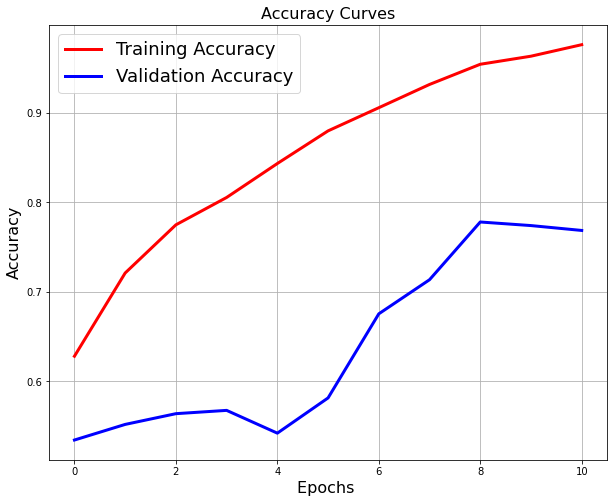

In [20]:
plt.figure(figsize=[10,8])
plt.grid()
plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

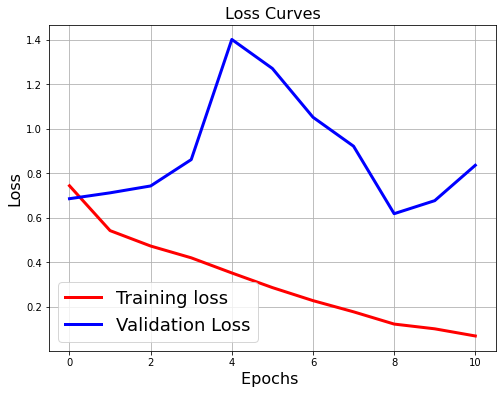

In [21]:
plt.figure(figsize=[8,6])
plt.grid()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

<!--  -->Prediction on exemple datasets contains 16 random pictures of cats and dogs

In [22]:
exemp_path = 'C:/Moje rzeczy/Kursy/CatsVsDogs/CatsVsDogs/data/exemp/'
example_gen = ImageDataGenerator(rescale=1./255.)
examples = example_gen.flow_from_directory(exemp_path, batch_size=16, class_mode='binary', target_size=(150, 150))

Found 16 images belonging to 1 classes.


In [23]:
predcitions = model.predict(examples)
examamples_array = np.array([predcitions])
examples_data = (examamples_array > 0.5).astype(int)
for ex in np.nditer(examples_data):
    if ex == 1:
        print('Pies')
    else:
        print("Kot")

1/1 [==============================] - 0s 136ms/step
Kot
Kot
Pies
Pies
Kot
Kot
Kot
Kot
Pies
Kot
Pies
Kot
Pies
Pies
Kot
Pies
